In [1]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from gw_ot.wgw import Entropic_WGW

In [3]:
# visualize the points in 2D

def visualize_points(x, y, **kwargs):
    points = torch.cat((x,y), dim=0)
    colors = torch.cat((torch.zeros(x.shape[0]), torch.ones(y.shape[0])), dim=0)
    
    plt.figure(figsize=(6,6))
    plt.scatter(points[:,0], points[:, 1], c=colors, **kwargs)
    
    plt.show()
    

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
def cost_matrix(x, y):
    x_row = x.unsqueeze(1)
    y_col = y.unsqueeze(0)
    
    return torch.sum((x_row - y_col)**2, dim=-1)

In [6]:
def tensor_matrix_mul(Cx, Cy, P):
    nx, ny = Cx.shape[0], Cy.shape[0]
    def f1(a):
        return a**2
    def f2(b):
        return b**2
    def h1(a):
        return a
    def h2(b):
        return 2*b 
    
    px, py = P.sum(dim=1), P.sum(dim=0)
    
    Cxy = (f1(Cx) @ px.reshape(-1, 1)).repeat((1, ny)) + (py.reshape(1, -1) @ f2(Cy).T).repeat((nx, 1))
    L = Cxy - h1(Cx) @ P @ h2(Cy).T
    
    return L

In [7]:
def wgw_loss(x, y, P, lamda=1.):
    
    # compute w_loss
    x_row = x.unsqueeze(1)
    y_col = y.unsqueeze(0)
    norm = torch.sum((x_row - y_col)**2, dim=-1)
    
    w_cost = torch.sum(P * norm)
    
    # compute gw_loss
    Cx = cost_matrix(x, x)
    Cy = cost_matrix(y, y)
    
    L = tensor_matrix_mul(Cx, Cy, P)
    
    gw_cost = torch.sum(L * P)
    
    return lamda * w_cost + (1 - lamda) * gw_cost

x: 120 points


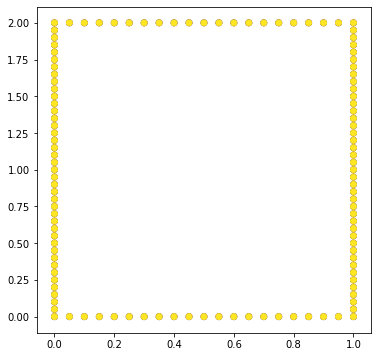

y: 600 points


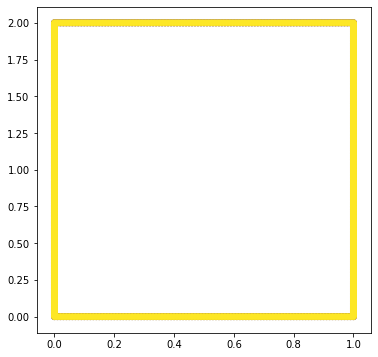

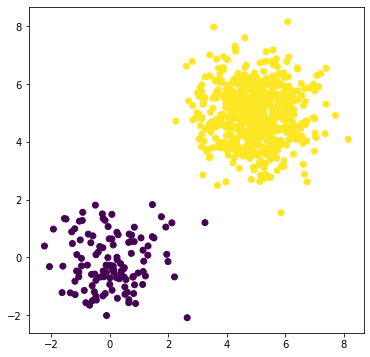

  0%|          | 0/10000 [00:00<?, ?epoch/s]

cuda:0


Ep: 0 | loss: 25433.6640625 | wgw_cost: 27.80978012084961 |:   0%|          | 0/10000 [00:02<?, ?epoch/s]

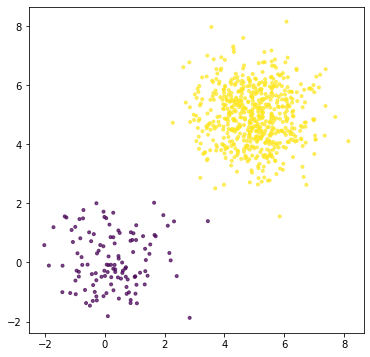

Ep: 10 | loss: 24338.810546875 | wgw_cost: 1.3682292699813843 |:   0%|          | 10/10000 [00:20<5:10:48,  1.87s/epoch]

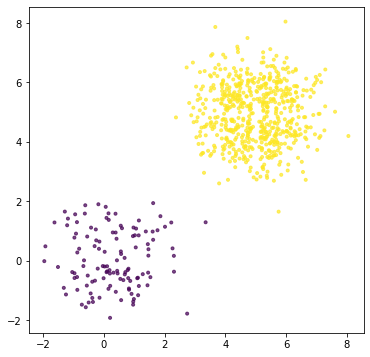

Ep: 20 | loss: 23398.3359375 | wgw_cost: 1.173553466796875 |:   0%|          | 20/10000 [00:36<4:26:28,  1.60s/epoch]   

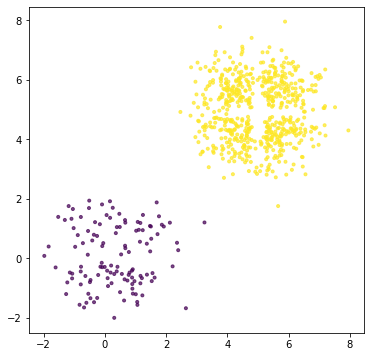

Ep: 30 | loss: 22583.0859375 | wgw_cost: 1.13706636428833 |:   0%|          | 30/10000 [00:52<4:36:07,  1.66s/epoch]    

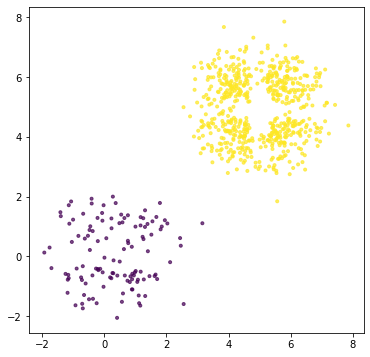

Ep: 40 | loss: 21881.044921875 | wgw_cost: 1.035650372505188 |:   0%|          | 40/10000 [01:08<4:16:45,  1.55s/epoch] 

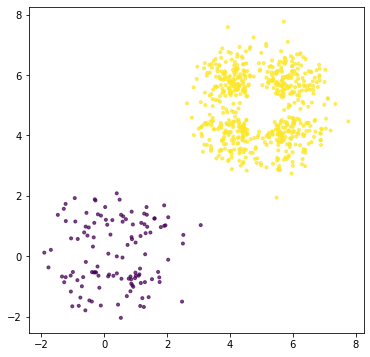

Ep: 50 | loss: 21281.453125 | wgw_cost: 0.9121028184890747 |:   0%|          | 50/10000 [01:24<4:12:10,  1.52s/epoch]   

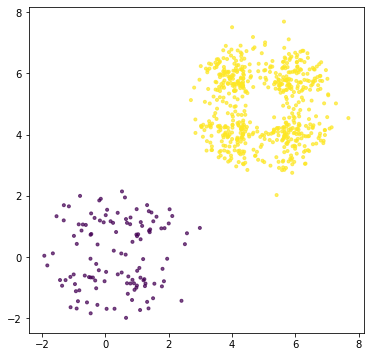

Ep: 60 | loss: 20773.25390625 | wgw_cost: 1.0394387245178223 |:   1%|          | 60/10000 [01:39<4:10:28,  1.51s/epoch] 

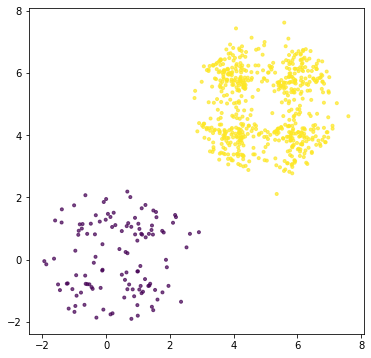

Ep: 70 | loss: 20342.109375 | wgw_cost: 0.7752172350883484 |:   1%|          | 70/10000 [01:54<4:09:49,  1.51s/epoch]   

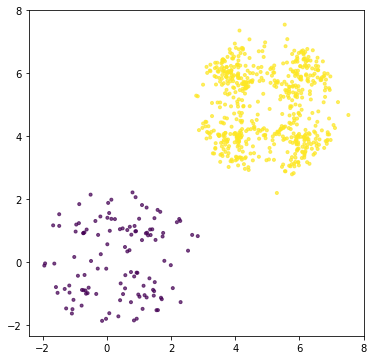

Ep: 80 | loss: 19970.357421875 | wgw_cost: 0.9689851403236389 |:   1%|          | 80/10000 [02:09<4:10:23,  1.51s/epoch]

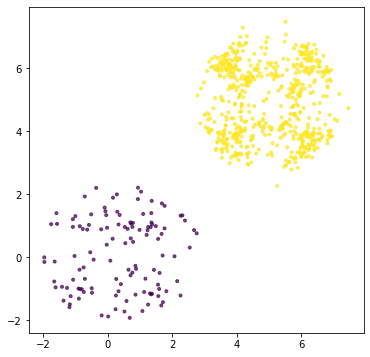

Ep: 90 | loss: 19630.365234375 | wgw_cost: 0.8122513890266418 |:   1%|          | 90/10000 [02:25<4:11:04,  1.52s/epoch]

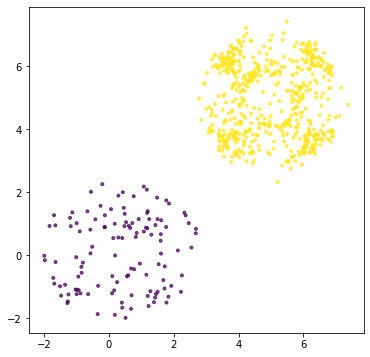

Ep: 100 | loss: 19286.142578125 | wgw_cost: 0.7526352405548096 |:   1%|          | 100/10000 [02:40<4:07:43,  1.50s/epoch]

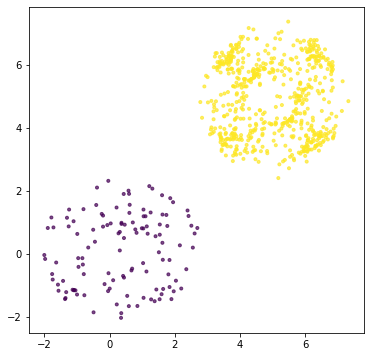

Ep: 110 | loss: 18892.80859375 | wgw_cost: 0.8042534589767456 |:   1%|          | 110/10000 [02:55<4:07:52,  1.50s/epoch] 

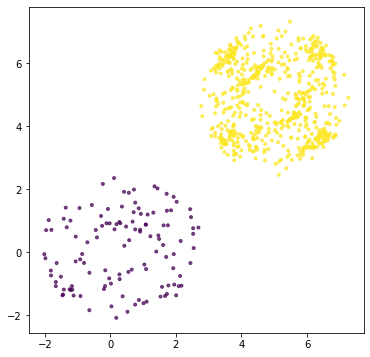

Ep: 120 | loss: 18399.412109375 | wgw_cost: 0.958217978477478 |:   1%|          | 120/10000 [03:09<3:48:21,  1.39s/epoch] 

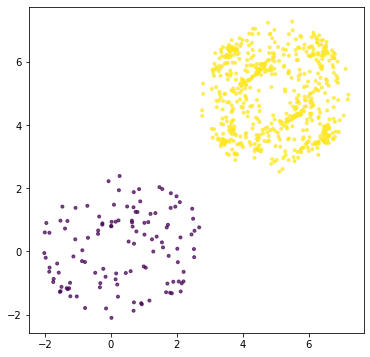

Ep: 130 | loss: 17753.314453125 | wgw_cost: 0.9241229891777039 |:   1%|▏         | 130/10000 [03:25<4:06:11,  1.50s/epoch]

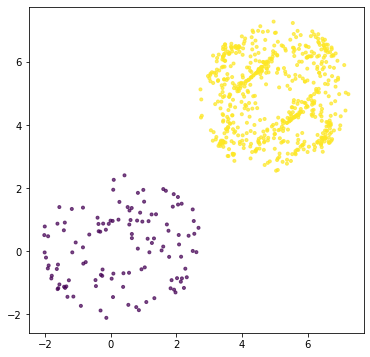

Ep: 140 | loss: 16912.326171875 | wgw_cost: 0.7614837288856506 |:   1%|▏         | 140/10000 [03:40<4:08:02,  1.51s/epoch]

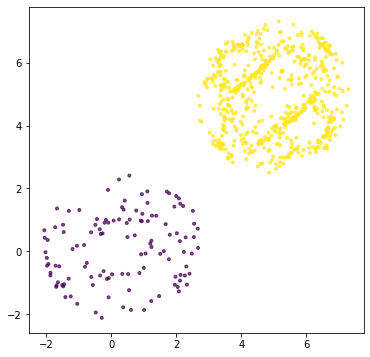

Ep: 150 | loss: 15861.52734375 | wgw_cost: 1.0265469551086426 |:   2%|▏         | 150/10000 [03:55<4:08:00,  1.51s/epoch]  

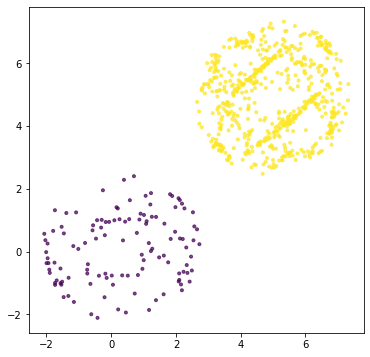

Ep: 160 | loss: 14621.0849609375 | wgw_cost: 1.1835683584213257 |:   2%|▏         | 160/10000 [04:10<4:06:58,  1.51s/epoch]

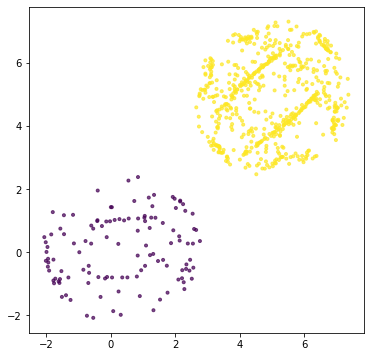

Ep: 170 | loss: 13242.0517578125 | wgw_cost: 0.8618088364601135 |:   2%|▏         | 170/10000 [04:25<4:07:03,  1.51s/epoch]

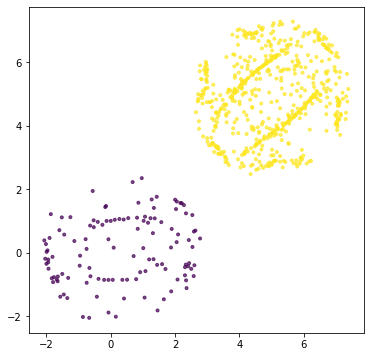

Ep: 180 | loss: 11792.978515625 | wgw_cost: 1.4829652309417725 |:   2%|▏         | 180/10000 [04:40<4:04:50,  1.50s/epoch] 

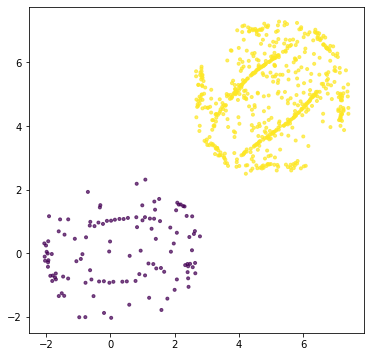

Ep: 190 | loss: 10336.8212890625 | wgw_cost: 1.6181573867797852 |:   2%|▏         | 190/10000 [04:55<3:45:02,  1.38s/epoch]

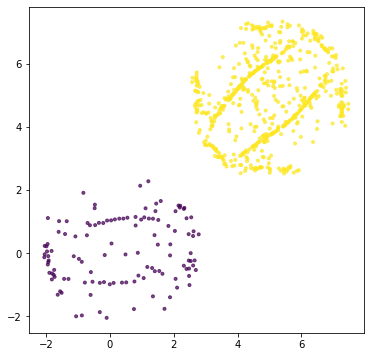

Ep: 200 | loss: 8920.7138671875 | wgw_cost: 0.8519333600997925 |:   2%|▏         | 200/10000 [05:09<3:44:49,  1.38s/epoch] 

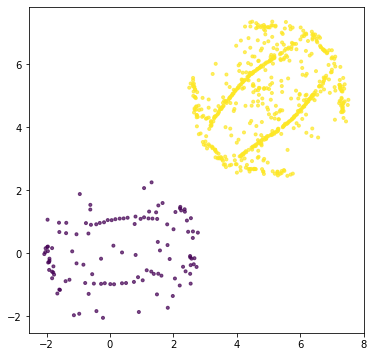

Ep: 210 | loss: 7575.30322265625 | wgw_cost: 0.8363440036773682 |:   2%|▏         | 210/10000 [05:24<4:06:30,  1.51s/epoch]

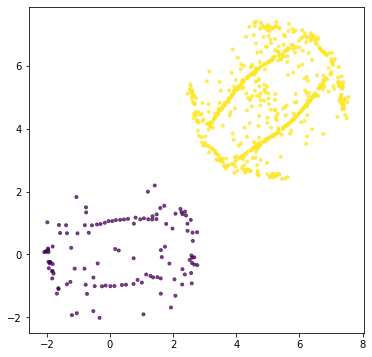

Ep: 220 | loss: 6319.24169921875 | wgw_cost: 0.801725447177887 |:   2%|▏         | 220/10000 [05:40<4:07:48,  1.52s/epoch] 

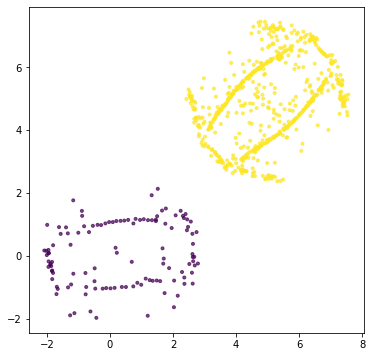

Ep: 230 | loss: 5170.51025390625 | wgw_cost: 0.7963893413543701 |:   2%|▏         | 230/10000 [05:55<4:04:16,  1.50s/epoch]

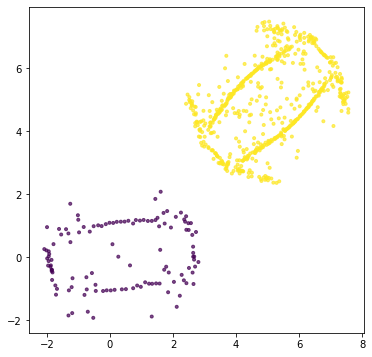

Ep: 240 | loss: 4151.22412109375 | wgw_cost: 4.639564514160156 |:   2%|▏         | 240/10000 [06:10<4:04:34,  1.50s/epoch] 

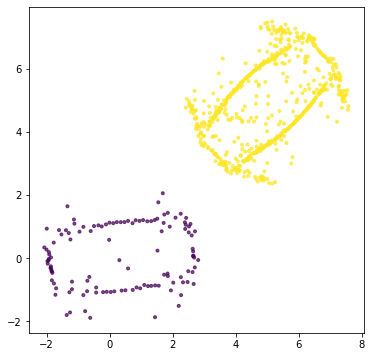

Ep: 250 | loss: 3271.490478515625 | wgw_cost: 6.086235523223877 |:   2%|▎         | 250/10000 [06:25<4:04:57,  1.51s/epoch] 

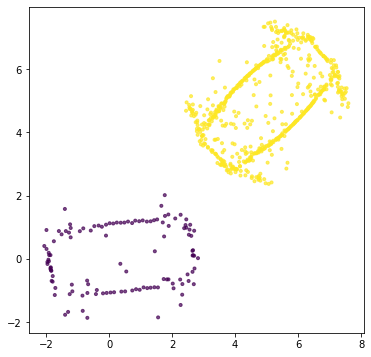

Ep: 260 | loss: 2546.61865234375 | wgw_cost: 9.020204544067383 |:   3%|▎         | 260/10000 [06:40<4:04:45,  1.51s/epoch]  

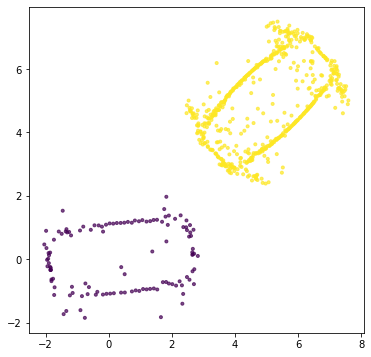

Ep: 270 | loss: 1978.063720703125 | wgw_cost: 14.468545913696289 |:   3%|▎         | 270/10000 [06:56<4:04:29,  1.51s/epoch] 

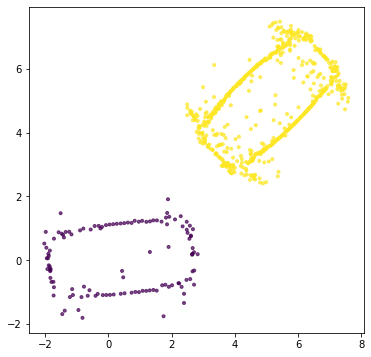

Ep: 280 | loss: 1531.473388671875 | wgw_cost: 0.5768678188323975 |:   3%|▎         | 280/10000 [07:11<4:03:23,  1.50s/epoch] 

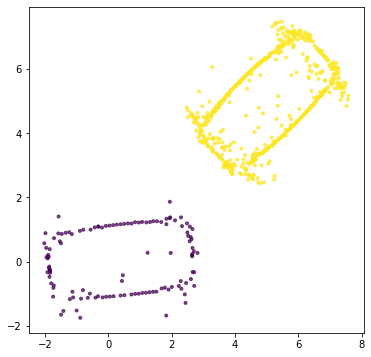

Ep: 290 | loss: 1216.58154296875 | wgw_cost: 0.5084701180458069 |:   3%|▎         | 290/10000 [07:26<4:03:08,  1.50s/epoch]  

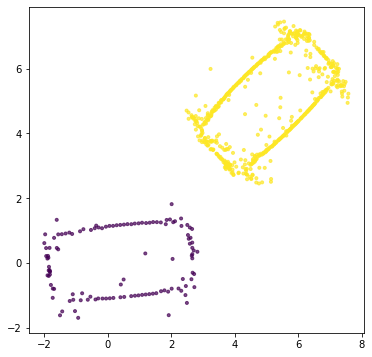

Ep: 300 | loss: 991.1065673828125 | wgw_cost: 0.43705281615257263 |:   3%|▎         | 300/10000 [07:41<4:03:38,  1.51s/epoch] 

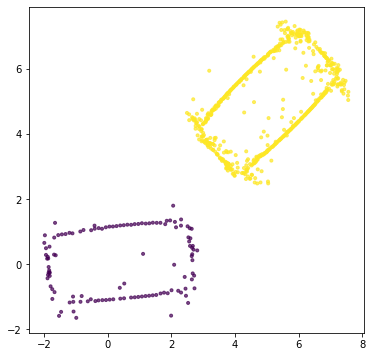

Ep: 310 | loss: 828.2066040039062 | wgw_cost: 0.388595312833786 |:   3%|▎         | 310/10000 [07:57<4:06:42,  1.53s/epoch]  

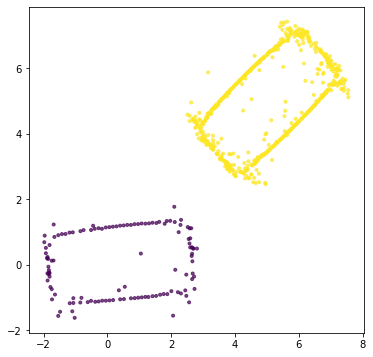

Ep: 320 | loss: 706.4381713867188 | wgw_cost: 0.3525428771972656 |:   3%|▎         | 320/10000 [08:12<4:05:18,  1.52s/epoch] 

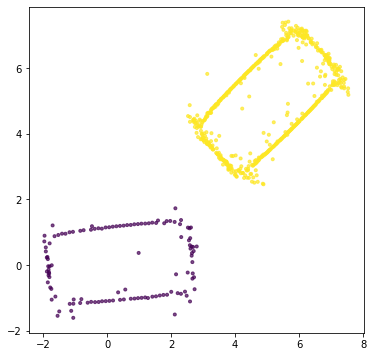

Ep: 330 | loss: 610.9329833984375 | wgw_cost: 0.3168666362762451 |:   3%|▎         | 330/10000 [08:28<4:03:06,  1.51s/epoch] 

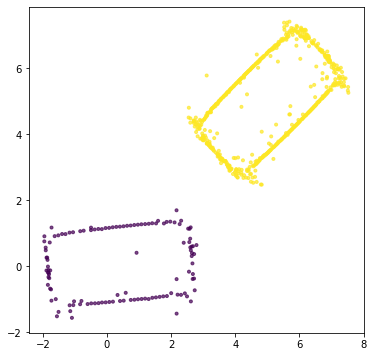

Ep: 340 | loss: 532.6358642578125 | wgw_cost: 0.2736266553401947 |:   3%|▎         | 340/10000 [08:45<4:31:28,  1.69s/epoch] 

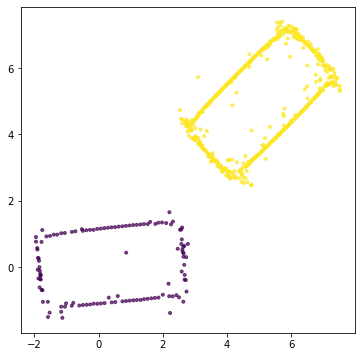

Ep: 350 | loss: 466.3028564453125 | wgw_cost: 0.23388996720314026 |:   4%|▎         | 350/10000 [09:02<4:16:52,  1.60s/epoch] 

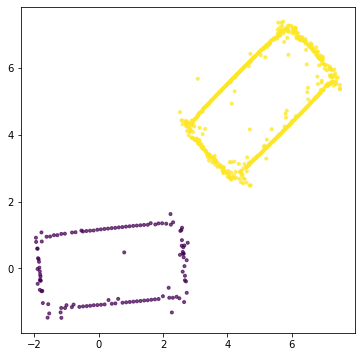

Ep: 360 | loss: 408.959228515625 | wgw_cost: 0.21340341866016388 |:   4%|▎         | 360/10000 [09:18<4:34:56,  1.71s/epoch]  

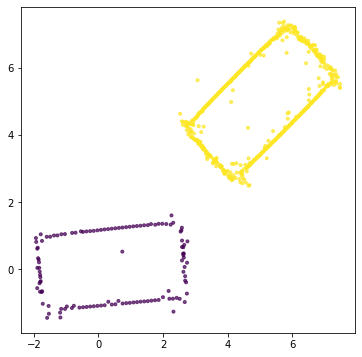

Ep: 370 | loss: 358.8050842285156 | wgw_cost: 0.1989586055278778 |:   4%|▎         | 370/10000 [09:33<4:03:04,  1.51s/epoch]  

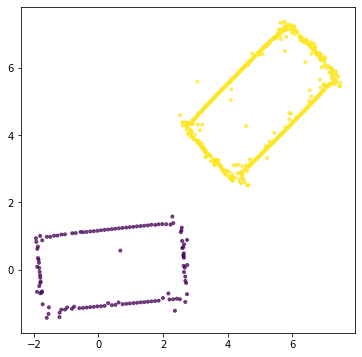

Ep: 380 | loss: 314.6524353027344 | wgw_cost: 0.1881711184978485 |:   4%|▍         | 380/10000 [09:48<4:03:19,  1.52s/epoch]  

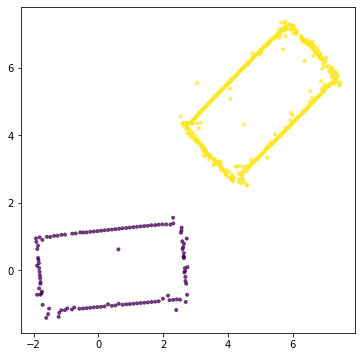

Ep: 390 | loss: 275.6213073730469 | wgw_cost: 0.17809545993804932 |:   4%|▍         | 390/10000 [10:04<4:01:36,  1.51s/epoch] 

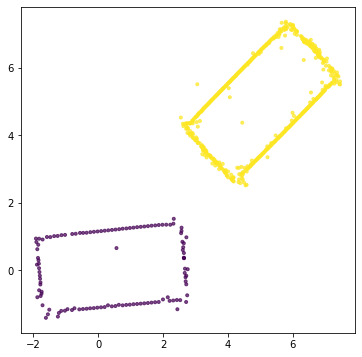

Ep: 400 | loss: 241.02322387695312 | wgw_cost: 0.1735111027956009 |:   4%|▍         | 400/10000 [10:20<4:12:49,  1.58s/epoch] 

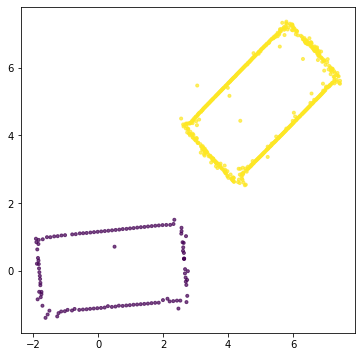

Ep: 410 | loss: 210.26422119140625 | wgw_cost: 0.14451996982097626 |:   4%|▍         | 410/10000 [10:35<4:09:38,  1.56s/epoch]

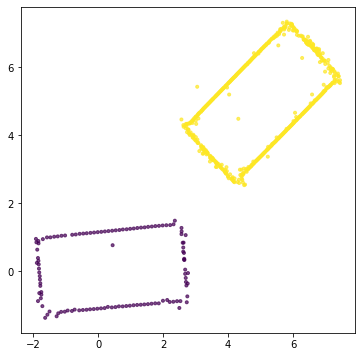

Ep: 420 | loss: 182.93482971191406 | wgw_cost: 0.1352318525314331 |:   4%|▍         | 420/10000 [10:52<4:07:31,  1.55s/epoch] 

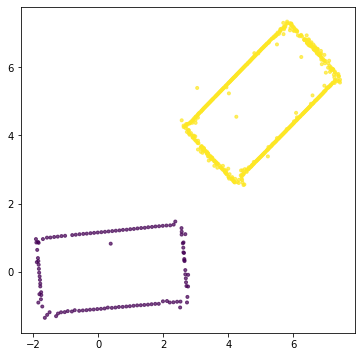

Ep: 430 | loss: 158.64447021484375 | wgw_cost: 0.12195299565792084 |:   4%|▍         | 430/10000 [11:08<4:30:27,  1.70s/epoch]

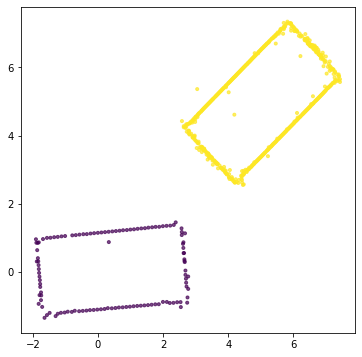

Ep: 440 | loss: 137.09986877441406 | wgw_cost: 0.11215390264987946 |:   4%|▍         | 440/10000 [11:24<4:10:04,  1.57s/epoch]

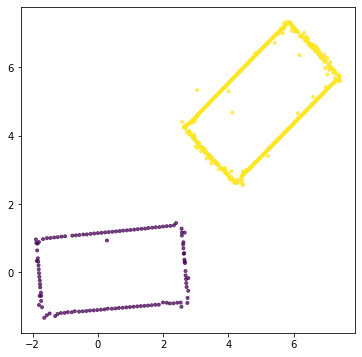

Ep: 450 | loss: 118.04432678222656 | wgw_cost: 0.1005682498216629 |:   4%|▍         | 450/10000 [11:40<4:06:21,  1.55s/epoch] 

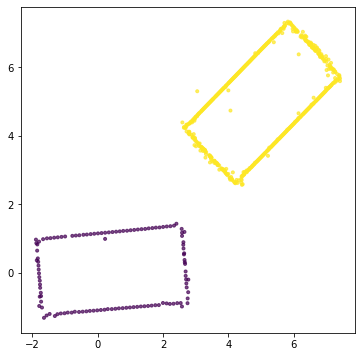

Ep: 460 | loss: 101.26597595214844 | wgw_cost: 0.09165532141923904 |:   5%|▍         | 460/10000 [11:57<4:23:48,  1.66s/epoch]

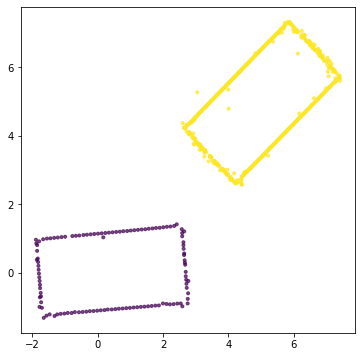

Ep: 470 | loss: 86.56666564941406 | wgw_cost: 0.08245324343442917 |:   5%|▍         | 470/10000 [12:13<4:05:25,  1.55s/epoch] 

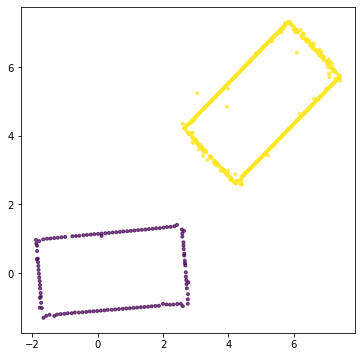

Ep: 480 | loss: 73.7671127319336 | wgw_cost: 0.07651031017303467 |:   5%|▍         | 480/10000 [12:30<4:12:31,  1.59s/epoch] 

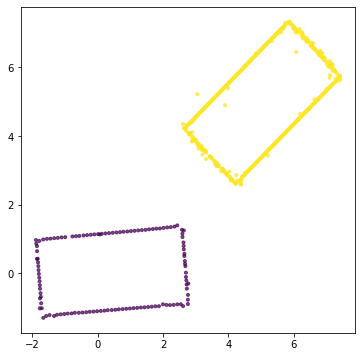

Ep: 490 | loss: 62.688812255859375 | wgw_cost: 0.07090578973293304 |:   5%|▍         | 490/10000 [12:45<3:58:51,  1.51s/epoch]

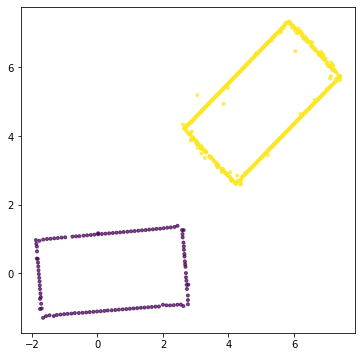

Ep: 500 | loss: 53.159385681152344 | wgw_cost: 0.06641795486211777 |:   5%|▌         | 500/10000 [13:02<4:39:13,  1.76s/epoch]

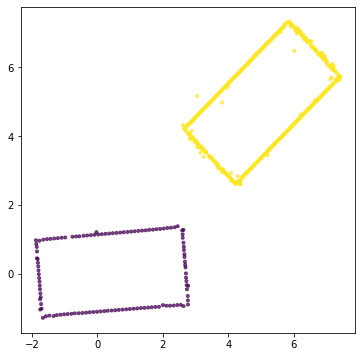

Ep: 510 | loss: 45.00965118408203 | wgw_cost: 0.06229672580957413 |:   5%|▌         | 510/10000 [13:18<4:27:33,  1.69s/epoch] 

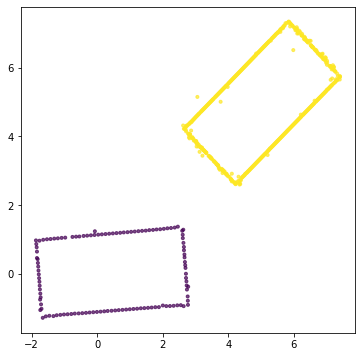

Ep: 520 | loss: 38.076271057128906 | wgw_cost: 0.05899243801832199 |:   5%|▌         | 520/10000 [13:35<4:38:48,  1.76s/epoch] 

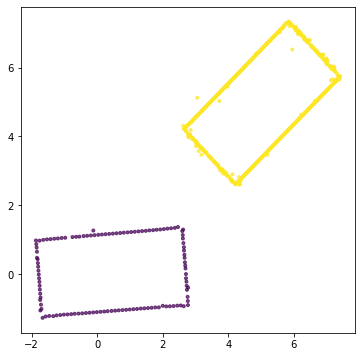

Ep: 530 | loss: 32.20233154296875 | wgw_cost: 0.05573052540421486 |:   5%|▌         | 530/10000 [13:50<4:00:18,  1.52s/epoch] 

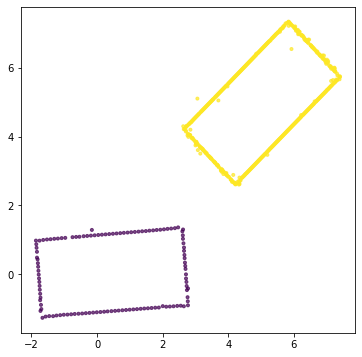

Ep: 540 | loss: 27.243011474609375 | wgw_cost: 0.052771858870983124 |:   5%|▌         | 540/10000 [14:06<4:01:11,  1.53s/epoch]

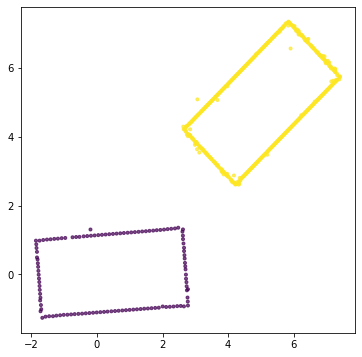

Ep: 550 | loss: 23.065126419067383 | wgw_cost: 0.04985908418893814 |:   6%|▌         | 550/10000 [14:22<4:17:50,  1.64s/epoch] 

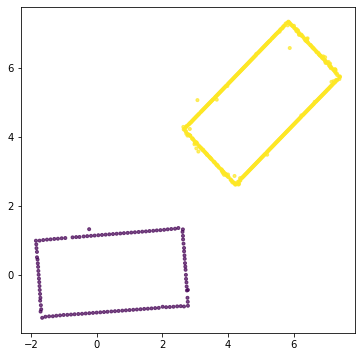

Ep: 560 | loss: 19.55189323425293 | wgw_cost: 0.0489274300634861 |:   6%|▌         | 560/10000 [14:38<4:31:20,  1.72s/epoch]   

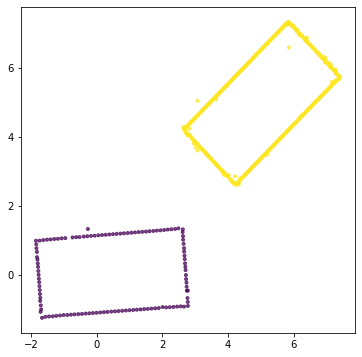

Ep: 570 | loss: 16.59541130065918 | wgw_cost: 0.046766526997089386 |:   6%|▌         | 570/10000 [14:54<4:18:49,  1.65s/epoch] 

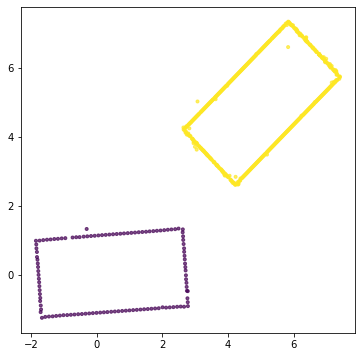

Ep: 580 | loss: 14.10761833190918 | wgw_cost: 0.04539196938276291 |:   6%|▌         | 580/10000 [15:12<4:29:15,  1.72s/epoch]  

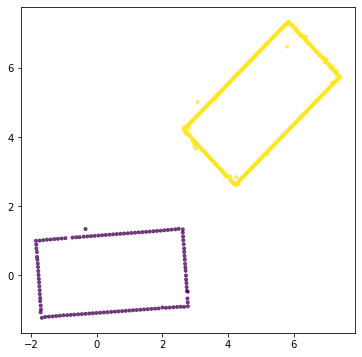

Ep: 590 | loss: 12.010600090026855 | wgw_cost: 0.04381473362445831 |:   6%|▌         | 590/10000 [15:28<4:19:48,  1.66s/epoch] 

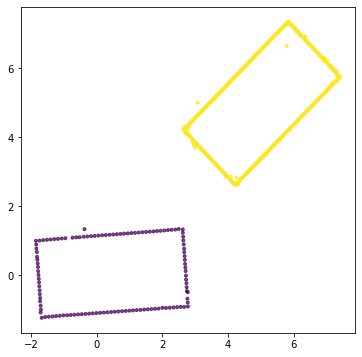

Ep: 600 | loss: 10.24026107788086 | wgw_cost: 0.042976003140211105 |:   6%|▌         | 600/10000 [15:45<4:23:45,  1.68s/epoch] 

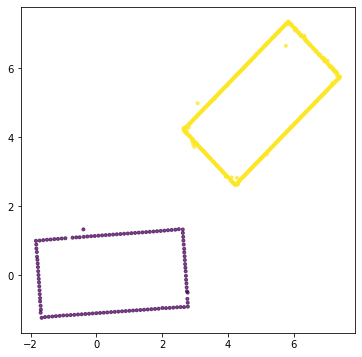

Ep: 610 | loss: 111.24066162109375 | wgw_cost: 102.5408935546875 |:   6%|▌         | 610/10000 [16:03<4:14:19,  1.63s/epoch]  

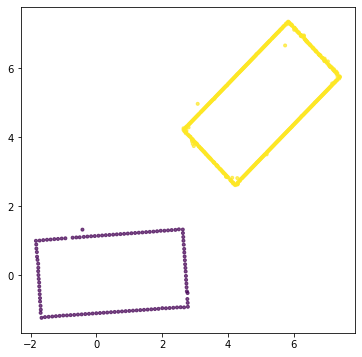

Ep: 620 | loss: 7.560975074768066 | wgw_cost: 0.04433376342058182 |:   6%|▌         | 620/10000 [16:20<4:41:50,  1.80s/epoch] 

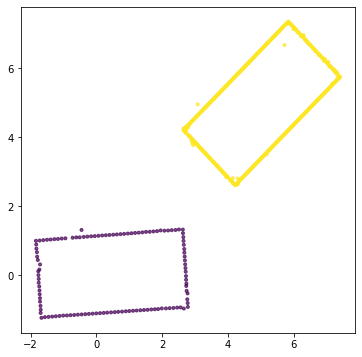

Ep: 630 | loss: 6.516406536102295 | wgw_cost: 0.042356740683317184 |:   6%|▋         | 630/10000 [16:36<4:17:10,  1.65s/epoch]

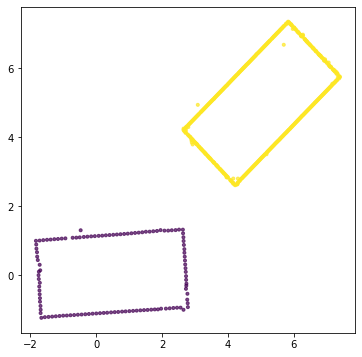

Ep: 640 | loss: 5.7450079917907715 | wgw_cost: 0.04835490137338638 |:   6%|▋         | 640/10000 [16:53<4:25:50,  1.70s/epoch]

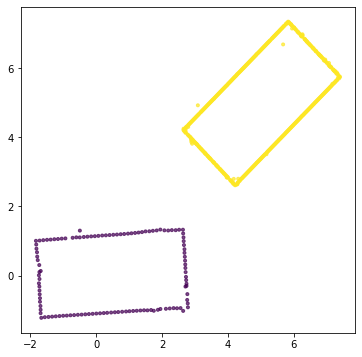

Ep: 650 | loss: 59.4348258972168 | wgw_cost: 54.59225845336914 |:   6%|▋         | 650/10000 [17:11<4:11:23,  1.61s/epoch]     

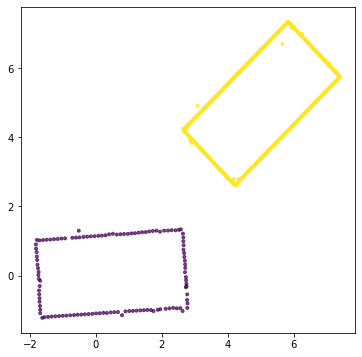

Ep: 660 | loss: 4.8507795333862305 | wgw_cost: 0.061577364802360535 |:   7%|▋         | 660/10000 [17:28<4:14:59,  1.64s/epoch]

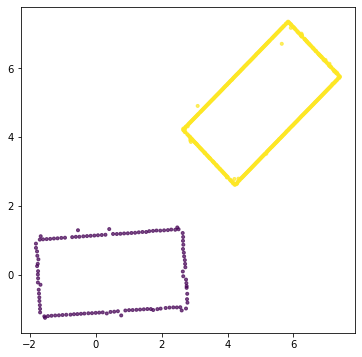

Ep: 670 | loss: 4.562679767608643 | wgw_cost: 0.06413523107767105 |:   7%|▋         | 670/10000 [17:45<4:16:44,  1.65s/epoch]  

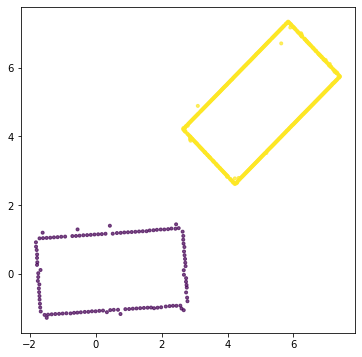

Ep: 680 | loss: 53.17356872558594 | wgw_cost: 49.522361755371094 |:   7%|▋         | 680/10000 [18:03<4:19:51,  1.67s/epoch]   

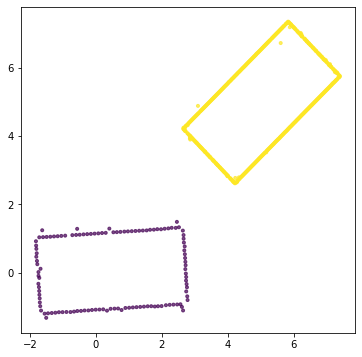

Ep: 690 | loss: 3.9789795875549316 | wgw_cost: 0.06997309625148773 |:   7%|▋         | 690/10000 [18:20<4:26:26,  1.72s/epoch]

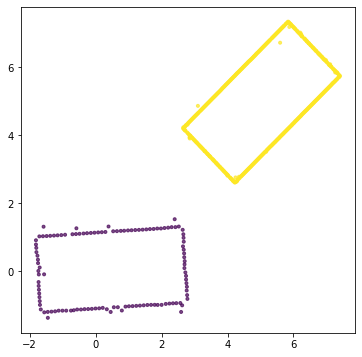

Ep: 700 | loss: 44.19489669799805 | wgw_cost: 39.54168701171875 |:   7%|▋         | 700/10000 [18:36<4:27:10,  1.72s/epoch]   

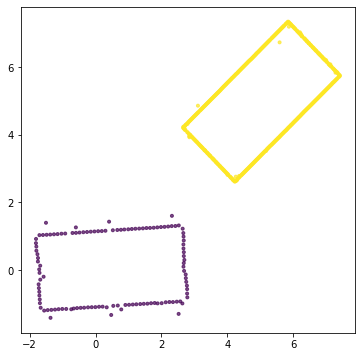

Ep: 710 | loss: 41.1242790222168 | wgw_cost: 35.95594024658203 |:   7%|▋         | 710/10000 [18:54<4:33:23,  1.77s/epoch]   

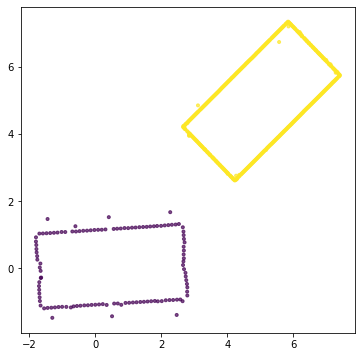

Ep: 720 | loss: 6.694736480712891 | wgw_cost: 0.21864834427833557 |:   7%|▋         | 720/10000 [19:10<4:19:28,  1.68s/epoch]

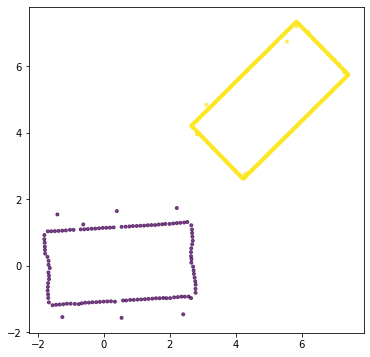

Ep: 730 | loss: 7.730703830718994 | wgw_cost: 0.2600767910480499 |:   7%|▋         | 730/10000 [19:26<4:11:46,  1.63s/epoch] 

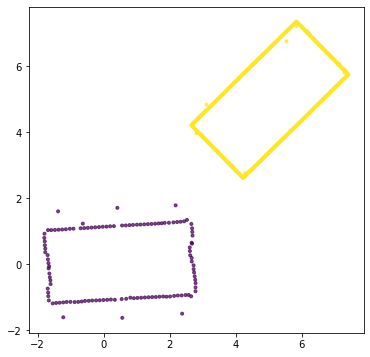

Ep: 740 | loss: 37.441890716552734 | wgw_cost: 30.999868392944336 |:   7%|▋         | 740/10000 [19:45<4:52:36,  1.90s/epoch]

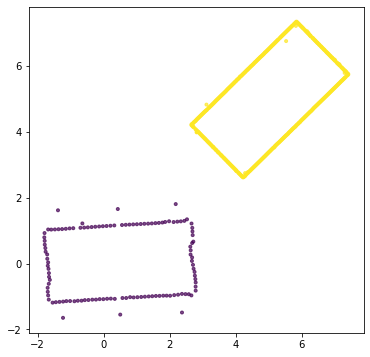

Ep: 750 | loss: 6.949362754821777 | wgw_cost: 0.24687346816062927 |:   8%|▊         | 750/10000 [20:03<4:10:34,  1.63s/epoch]

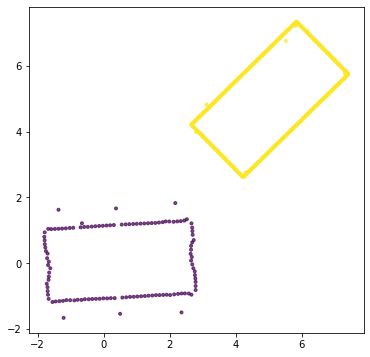

Ep: 760 | loss: 39.89208221435547 | wgw_cost: 34.899742126464844 |:   8%|▊         | 760/10000 [20:18<4:04:19,  1.59s/epoch] 

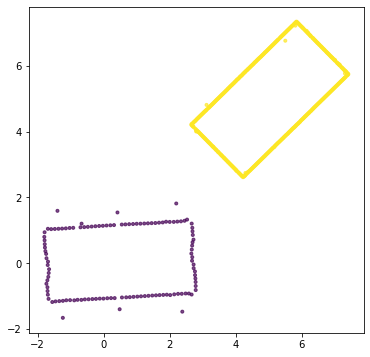

Ep: 770 | loss: 38.172080993652344 | wgw_cost: 32.28273391723633 |:   8%|▊         | 770/10000 [20:34<3:54:38,  1.53s/epoch] 

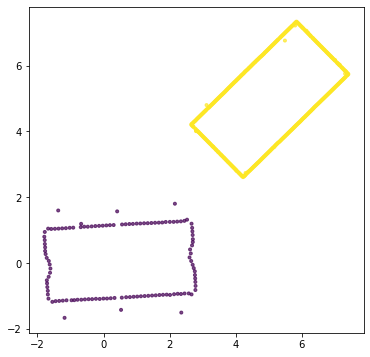

Ep: 780 | loss: 36.46910858154297 | wgw_cost: 29.150005340576172 |:   8%|▊         | 780/10000 [20:50<3:57:26,  1.55s/epoch] 

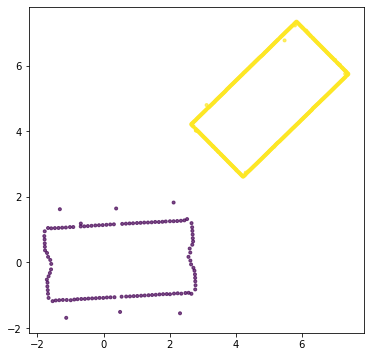

Ep: 790 | loss: 8.725712776184082 | wgw_cost: 0.3215462863445282 |:   8%|▊         | 790/10000 [21:05<3:55:03,  1.53s/epoch] 

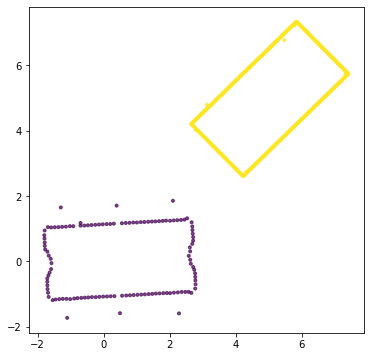

Ep: 800 | loss: 36.747798919677734 | wgw_cost: 29.921234130859375 |:   8%|▊         | 800/10000 [21:21<3:56:39,  1.54s/epoch] 

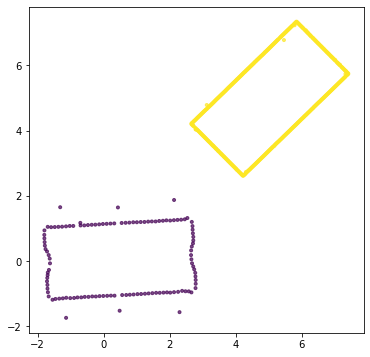

Ep: 810 | loss: 36.50397491455078 | wgw_cost: 29.57016944885254 |:   8%|▊         | 810/10000 [21:37<4:03:46,  1.59s/epoch]  

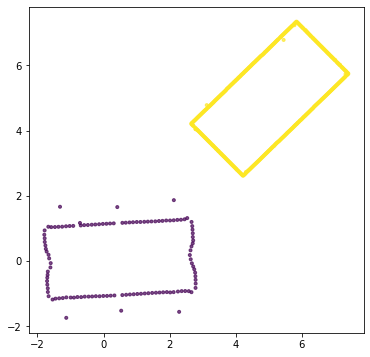

Ep: 820 | loss: 7.974620819091797 | wgw_cost: 0.28873294591903687 |:   8%|▊         | 820/10000 [21:53<4:07:06,  1.62s/epoch]

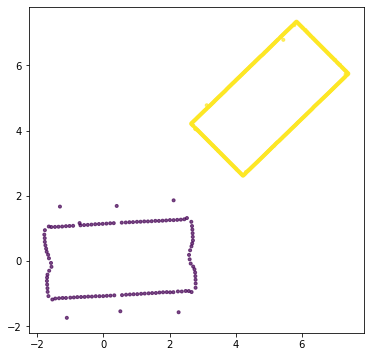

Ep: 830 | loss: 35.989017486572266 | wgw_cost: 28.56061553955078 |:   8%|▊         | 830/10000 [22:10<4:27:48,  1.75s/epoch] 

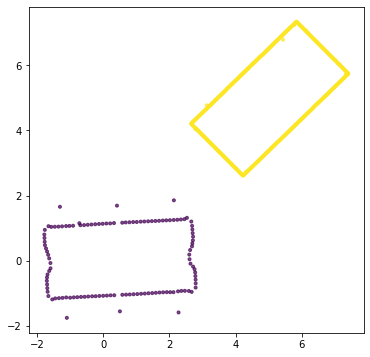

Ep: 840 | loss: 7.386991024017334 | wgw_cost: 0.28133702278137207 |:   8%|▊         | 840/10000 [22:25<3:52:34,  1.52s/epoch]

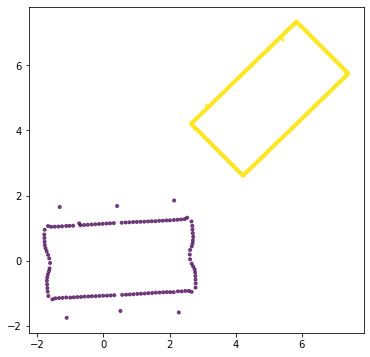

Ep: 850 | loss: 6.266799449920654 | wgw_cost: 0.24480119347572327 |:   8%|▊         | 850/10000 [22:42<3:57:22,  1.56s/epoch]

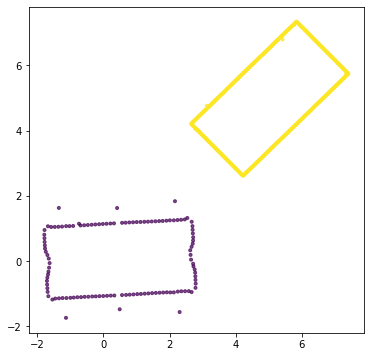

Ep: 860 | loss: 37.58411407470703 | wgw_cost: 31.76416015625 |:   9%|▊         | 860/10000 [22:58<4:26:27,  1.75s/epoch]     

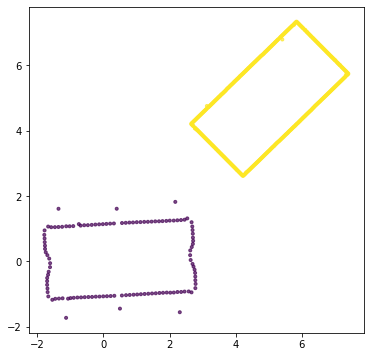

Ep: 870 | loss: 35.91096878051758 | wgw_cost: 27.922012329101562 |:   9%|▊         | 870/10000 [23:15<4:13:41,  1.67s/epoch] 

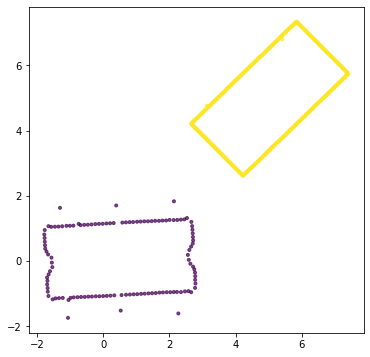

Ep: 880 | loss: 34.36981201171875 | wgw_cost: 24.298648834228516 |:   9%|▉         | 880/10000 [23:31<4:02:15,  1.59s/epoch] 

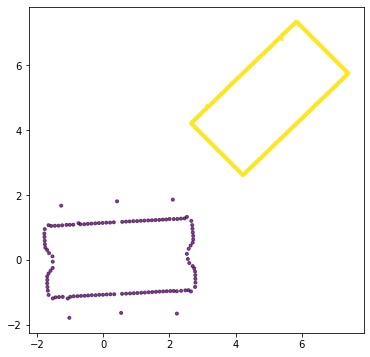

Ep: 890 | loss: 10.25963306427002 | wgw_cost: 0.43333497643470764 |:   9%|▉         | 890/10000 [23:48<4:18:26,  1.70s/epoch]

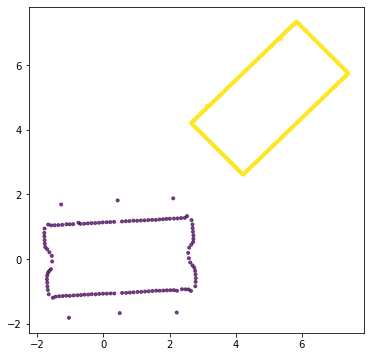

Ep: 900 | loss: 36.29421615600586 | wgw_cost: 28.950241088867188 |:   9%|▉         | 900/10000 [24:06<4:32:43,  1.80s/epoch] 

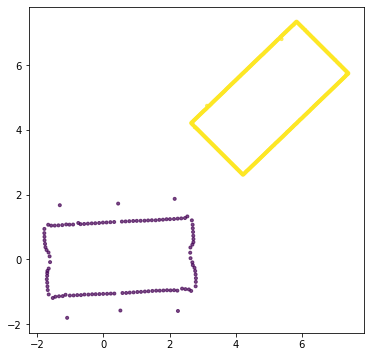

Ep: 910 | loss: 6.993096351623535 | wgw_cost: 0.2794588804244995 |:   9%|▉         | 910/10000 [24:24<4:25:15,  1.75s/epoch] 

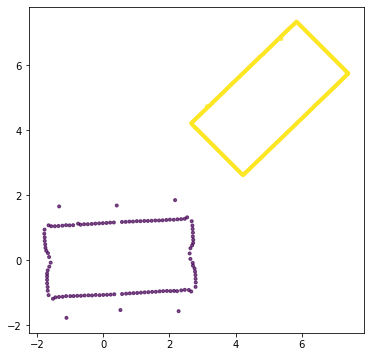

Ep: 920 | loss: 37.83704376220703 | wgw_cost: 31.910198211669922 |:   9%|▉         | 920/10000 [24:41<4:38:45,  1.84s/epoch]  

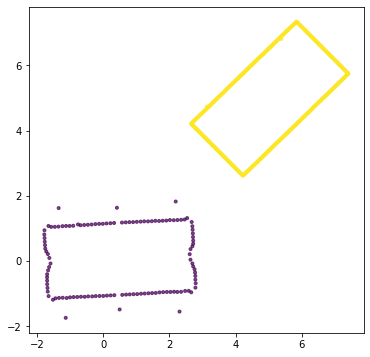

Ep: 930 | loss: 36.83159637451172 | wgw_cost: 29.996871948242188 |:   9%|▉         | 930/10000 [24:59<4:53:32,  1.94s/epoch] 

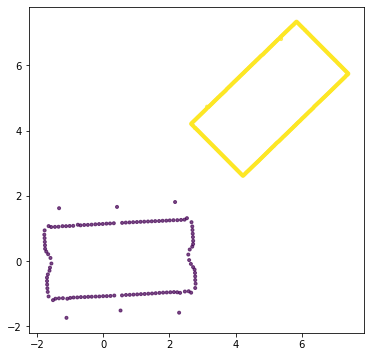

Ep: 940 | loss: 35.47146987915039 | wgw_cost: 27.470991134643555 |:   9%|▉         | 940/10000 [25:15<4:20:25,  1.72s/epoch] 

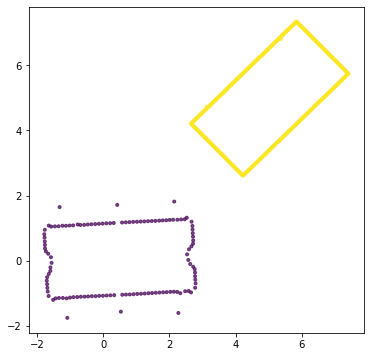

Ep: 950 | loss: 9.100666046142578 | wgw_cost: 0.37457770109176636 |:  10%|▉         | 950/10000 [25:32<3:59:14,  1.59s/epoch]

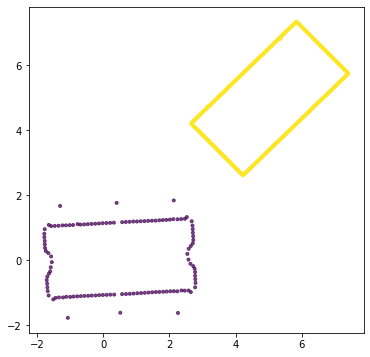

Ep: 960 | loss: 7.095796585083008 | wgw_cost: 0.28398463129997253 |:  10%|▉         | 960/10000 [25:48<3:54:48,  1.56s/epoch]

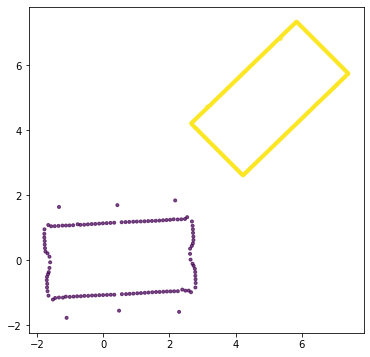

Ep: 970 | loss: 5.5080671310424805 | wgw_cost: 0.2111101746559143 |:  10%|▉         | 970/10000 [26:05<4:21:31,  1.74s/epoch] 

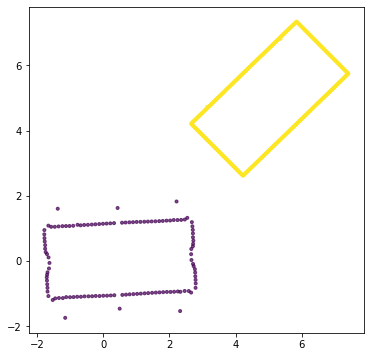

Ep: 980 | loss: 38.930179595947266 | wgw_cost: 33.89458465576172 |:  10%|▉         | 980/10000 [26:21<4:06:56,  1.64s/epoch] 

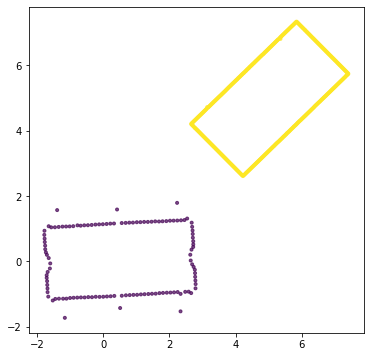

Ep: 990 | loss: 4.511868476867676 | wgw_cost: 0.1656203269958496 |:  10%|▉         | 990/10000 [26:39<4:25:41,  1.77s/epoch]  

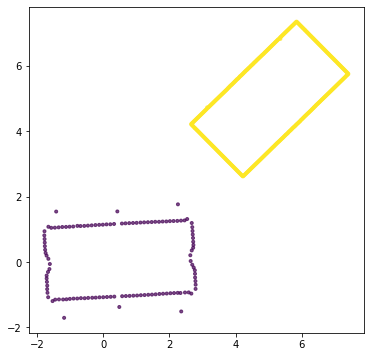

Ep: 1000 | loss: 41.67146301269531 | wgw_cost: 37.677921295166016 |:  10%|█         | 1000/10000 [26:56<3:57:06,  1.58s/epoch]

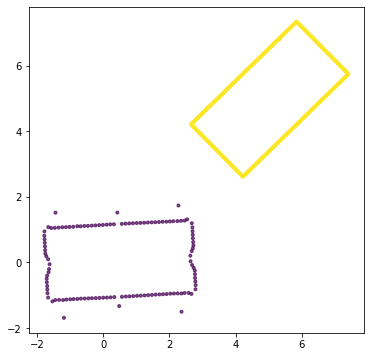

Ep: 1010 | loss: 5.361417293548584 | wgw_cost: 0.19597163796424866 |:  10%|█         | 1010/10000 [27:13<4:00:26,  1.60s/epoch]

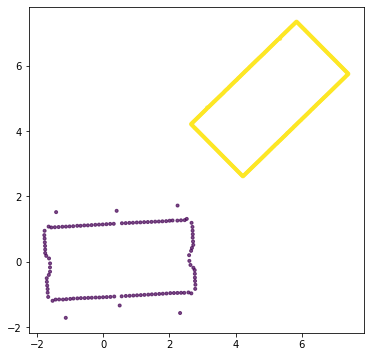

Ep: 1020 | loss: 40.5679817199707 | wgw_cost: 35.781620025634766 |:  10%|█         | 1020/10000 [27:29<3:57:08,  1.58s/epoch]   

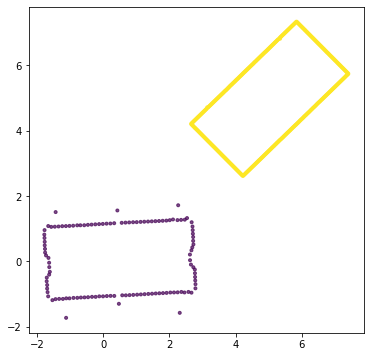

Ep: 1030 | loss: 39.24748229980469 | wgw_cost: 33.163330078125 |:  10%|█         | 1030/10000 [27:46<4:10:43,  1.68s/epoch]    

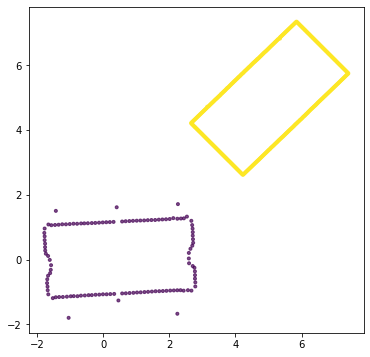

Ep: 1040 | loss: 36.7947883605957 | wgw_cost: 28.259702682495117 |:  10%|█         | 1040/10000 [28:04<4:18:58,  1.73s/epoch]  

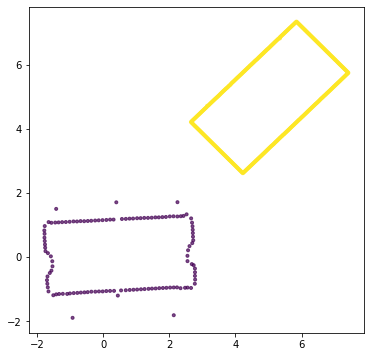

Ep: 1050 | loss: 35.22190475463867 | wgw_cost: 24.973600387573242 |:  10%|█         | 1050/10000 [28:21<3:54:06,  1.57s/epoch] 

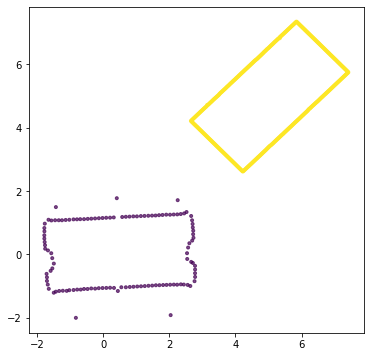

Ep: 1060 | loss: 9.839646339416504 | wgw_cost: 0.3836336135864258 |:  11%|█         | 1060/10000 [28:38<4:22:09,  1.76s/epoch]  

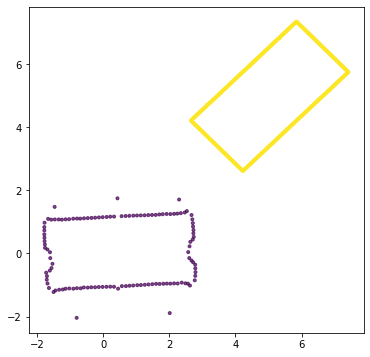

Ep: 1070 | loss: 37.20380783081055 | wgw_cost: 29.64791488647461 |:  11%|█         | 1070/10000 [28:55<4:03:28,  1.64s/epoch]  

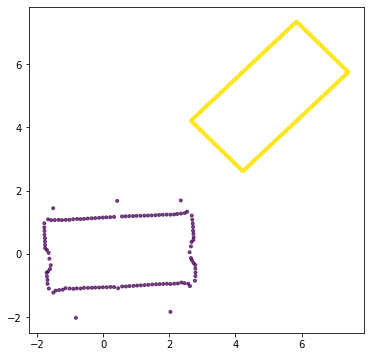

Ep: 1080 | loss: 36.86893844604492 | wgw_cost: 29.28892707824707 |:  11%|█         | 1080/10000 [29:12<4:30:49,  1.82s/epoch]  

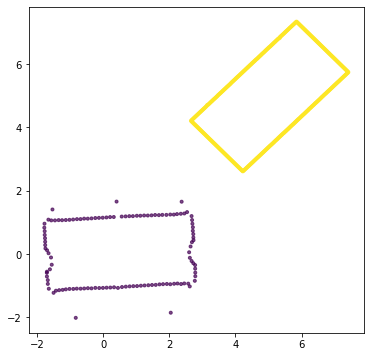

Ep: 1090 | loss: 7.313474178314209 | wgw_cost: 0.28605207800865173 |:  11%|█         | 1090/10000 [29:30<4:15:22,  1.72s/epoch]

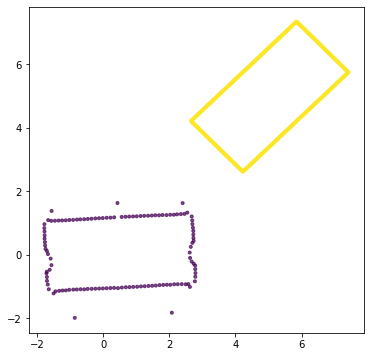

Ep: 1100 | loss: 6.476292610168457 | wgw_cost: 0.24436838924884796 |:  11%|█         | 1100/10000 [29:48<4:36:15,  1.86s/epoch]

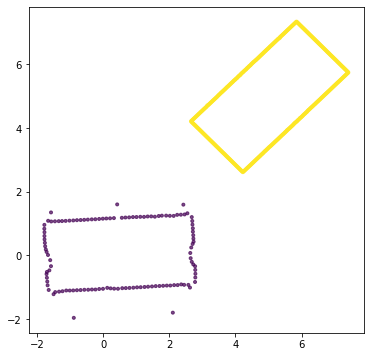

Ep: 1110 | loss: 6.266981601715088 | wgw_cost: 0.23521597683429718 |:  11%|█         | 1110/10000 [30:04<4:16:29,  1.73s/epoch]

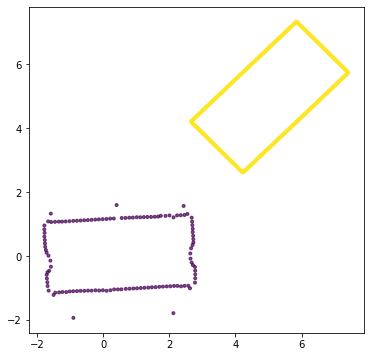

Ep: 1120 | loss: 36.78903579711914 | wgw_cost: 29.58502197265625 |:  11%|█         | 1120/10000 [30:22<4:07:04,  1.67s/epoch]  

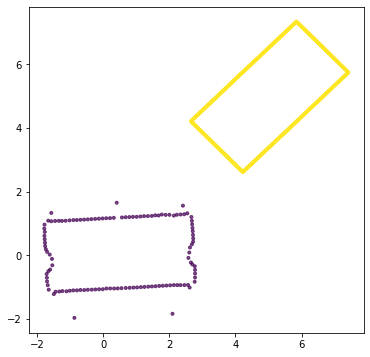

Ep: 1130 | loss: 36.43396759033203 | wgw_cost: 28.63626480102539 |:  11%|█▏        | 1130/10000 [30:38<4:00:10,  1.62s/epoch] 

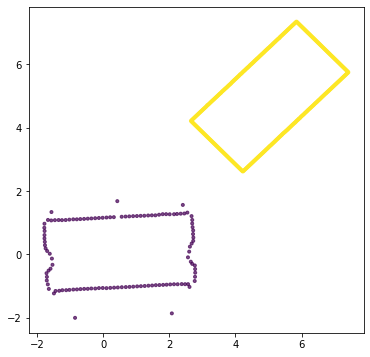

Ep: 1140 | loss: 7.216405391693115 | wgw_cost: 0.2641385793685913 |:  11%|█▏        | 1140/10000 [30:57<4:42:22,  1.91s/epoch] 

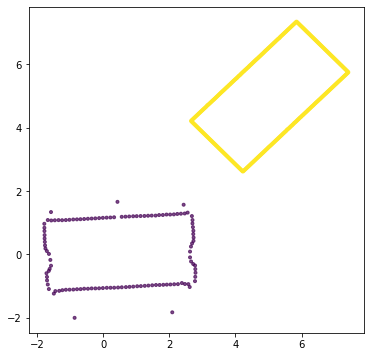

Ep: 1150 | loss: 37.3862190246582 | wgw_cost: 30.99099349975586 |:  12%|█▏        | 1150/10000 [31:15<4:08:25,  1.68s/epoch]   

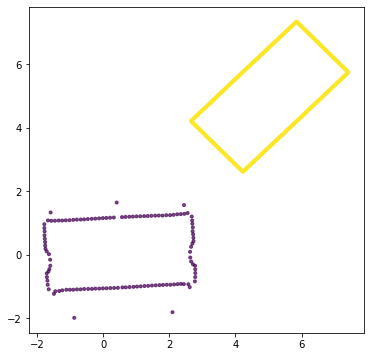

Ep: 1160 | loss: 6.6200971603393555 | wgw_cost: 0.24980701506137848 |:  12%|█▏        | 1160/10000 [31:32<3:59:50,  1.63s/epoch]

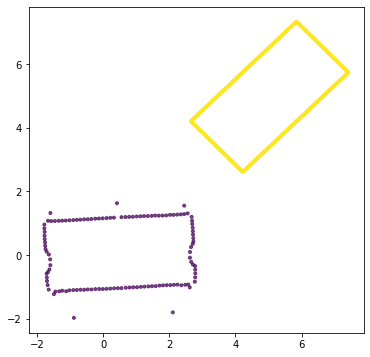

Ep: 1170 | loss: 37.36563491821289 | wgw_cost: 31.651687622070312 |:  12%|█▏        | 1170/10000 [31:49<4:31:59,  1.85s/epoch]  

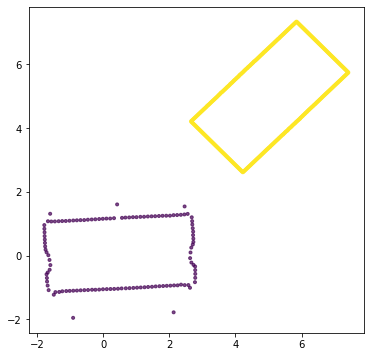

Ep: 1180 | loss: 5.648273944854736 | wgw_cost: 0.18326741456985474 |:  12%|█▏        | 1180/10000 [32:06<4:02:21,  1.65s/epoch]

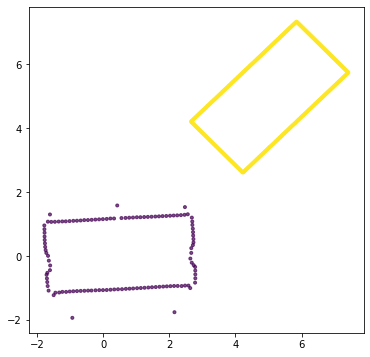

Ep: 1190 | loss: 5.554422855377197 | wgw_cost: 0.19797982275485992 |:  12%|█▏        | 1190/10000 [32:24<4:16:03,  1.74s/epoch]

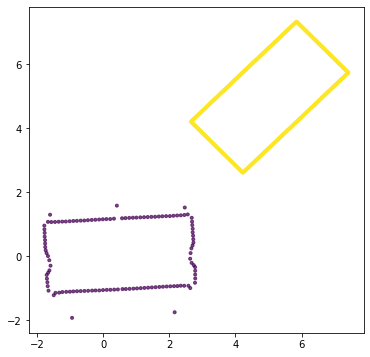

Ep: 1200 | loss: 39.66484069824219 | wgw_cost: 34.77037811279297 |:  12%|█▏        | 1200/10000 [32:40<4:00:43,  1.64s/epoch]   

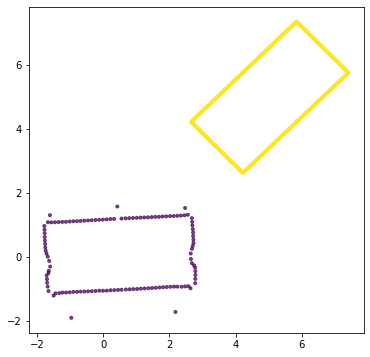

Ep: 1210 | loss: 5.325685501098633 | wgw_cost: 0.20774134993553162 |:  12%|█▏        | 1210/10000 [32:57<4:03:40,  1.66s/epoch]

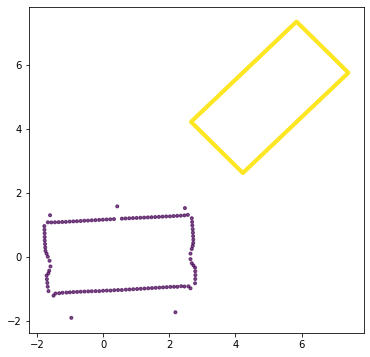

Ep: 1220 | loss: 39.99345397949219 | wgw_cost: 35.524166107177734 |:  12%|█▏        | 1220/10000 [33:13<3:55:21,  1.61s/epoch]  

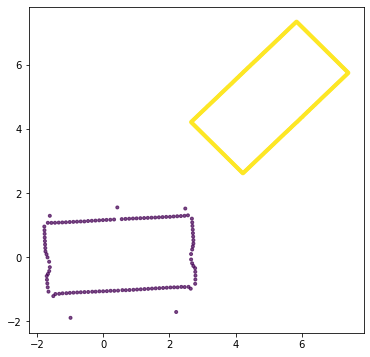

Ep: 1230 | loss: 4.725493431091309 | wgw_cost: 0.18351471424102783 |:  12%|█▏        | 1230/10000 [33:30<3:48:34,  1.56s/epoch]

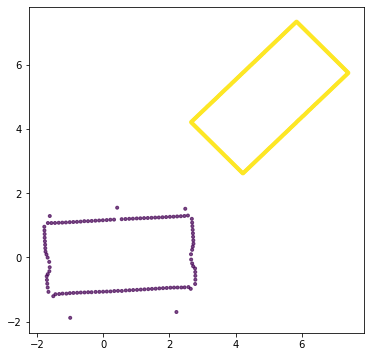

Ep: 1240 | loss: 4.7305803298950195 | wgw_cost: 0.18405967950820923 |:  12%|█▏        | 1240/10000 [33:48<4:29:11,  1.84s/epoch]

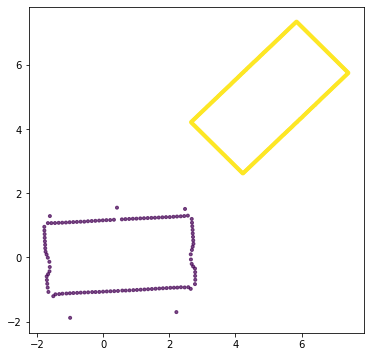

Ep: 1250 | loss: 40.37858963012695 | wgw_cost: 36.026123046875 |:  12%|█▎        | 1250/10000 [34:06<4:11:20,  1.72s/epoch]     

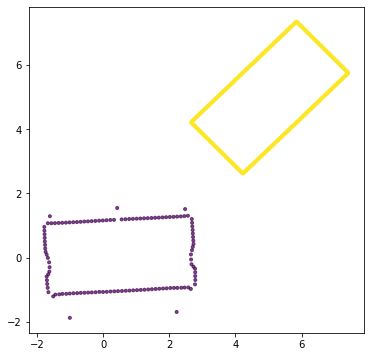

Ep: 1260 | loss: 4.646571636199951 | wgw_cost: 0.18157389760017395 |:  13%|█▎        | 1260/10000 [34:25<4:48:19,  1.98s/epoch]

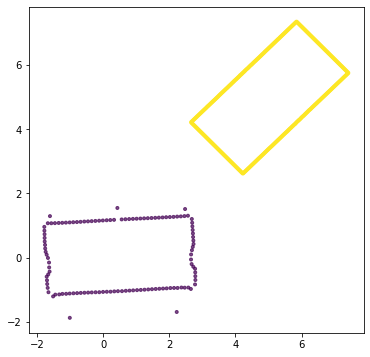

Ep: 1270 | loss: 40.17695236206055 | wgw_cost: 35.7056884765625 |:  13%|█▎        | 1270/10000 [34:41<3:49:25,  1.58s/epoch]   

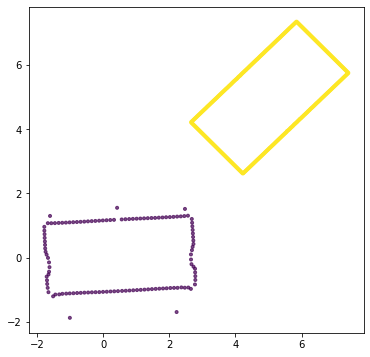

Ep: 1280 | loss: 4.817882537841797 | wgw_cost: 0.18870218098163605 |:  13%|█▎        | 1280/10000 [34:58<4:10:15,  1.72s/epoch] 

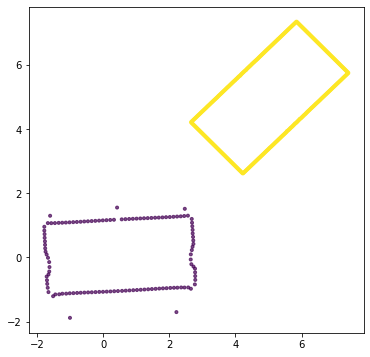

Ep: 1290 | loss: 5.214820861816406 | wgw_cost: 0.20187875628471375 |:  13%|█▎        | 1290/10000 [35:15<4:02:45,  1.67s/epoch] 

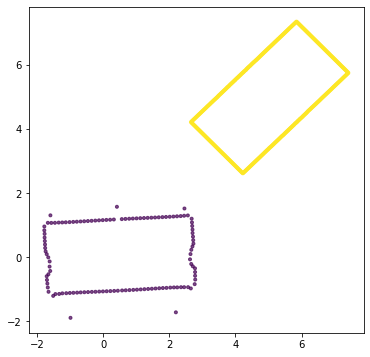

Ep: 1300 | loss: 40.176578521728516 | wgw_cost: 35.749332427978516 |:  13%|█▎        | 1300/10000 [35:32<4:05:32,  1.69s/epoch]

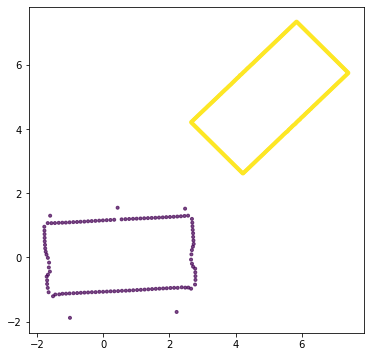

Ep: 1310 | loss: 5.148263931274414 | wgw_cost: 0.20575740933418274 |:  13%|█▎        | 1310/10000 [35:47<3:44:49,  1.55s/epoch]

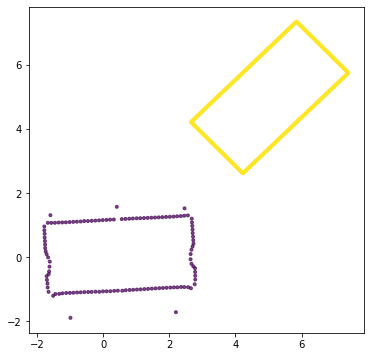

Ep: 1320 | loss: 39.93550491333008 | wgw_cost: 35.59256362915039 |:  13%|█▎        | 1320/10000 [36:04<4:16:35,  1.77s/epoch]  

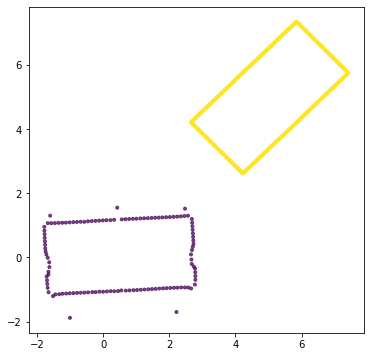

Ep: 1330 | loss: 41.074249267578125 | wgw_cost: 37.030052185058594 |:  13%|█▎        | 1330/10000 [36:21<4:11:45,  1.74s/epoch] 

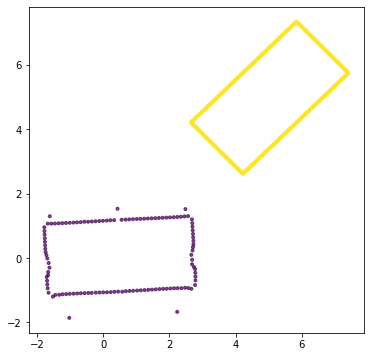

Ep: 1340 | loss: 4.516214847564697 | wgw_cost: 0.17546316981315613 |:  13%|█▎        | 1340/10000 [36:38<4:17:38,  1.79s/epoch]

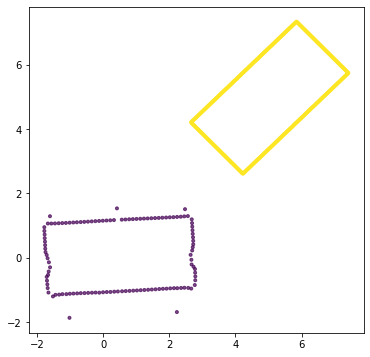

Ep: 1350 | loss: 4.4881672859191895 | wgw_cost: 0.1681026816368103 |:  14%|█▎        | 1350/10000 [36:55<4:18:31,  1.79s/epoch]

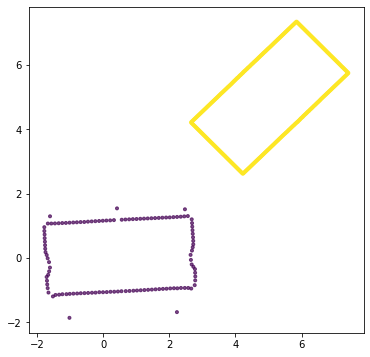

Ep: 1360 | loss: 4.114632606506348 | wgw_cost: 0.15031306445598602 |:  14%|█▎        | 1360/10000 [37:11<3:45:39,  1.57s/epoch] 

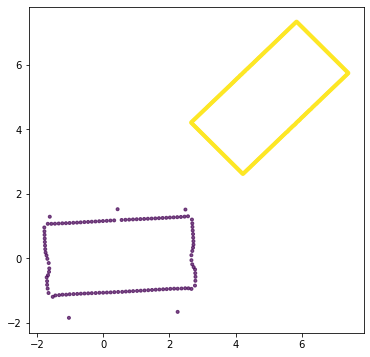

Ep: 1370 | loss: 39.857261657714844 | wgw_cost: 35.613067626953125 |:  14%|█▎        | 1370/10000 [37:28<3:50:07,  1.60s/epoch] 

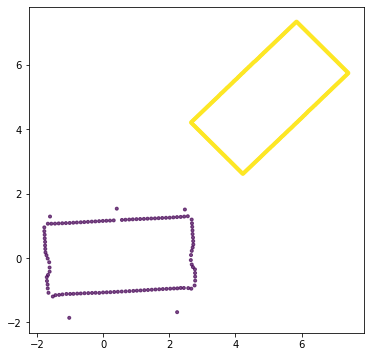

Ep: 1380 | loss: 38.51850891113281 | wgw_cost: 32.60942840576172 |:  14%|█▍        | 1380/10000 [37:44<4:10:00,  1.74s/epoch]  

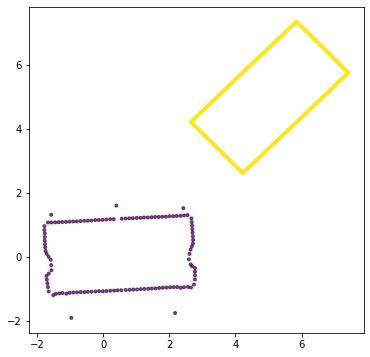

Ep: 1390 | loss: 35.94608688354492 | wgw_cost: 27.85555648803711 |:  14%|█▍        | 1390/10000 [38:00<3:44:07,  1.56s/epoch]  

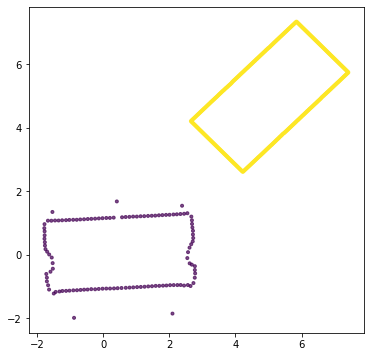

Ep: 1400 | loss: 8.394693374633789 | wgw_cost: 0.3276636302471161 |:  14%|█▍        | 1400/10000 [38:16<3:43:39,  1.56s/epoch] 

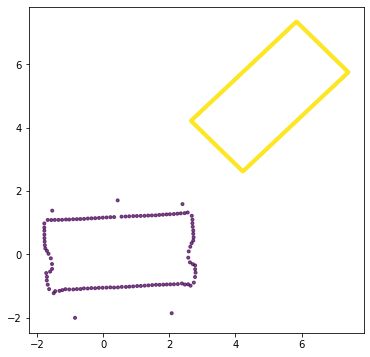

Ep: 1410 | loss: 6.317216873168945 | wgw_cost: 0.23432907462120056 |:  14%|█▍        | 1410/10000 [38:32<3:41:08,  1.54s/epoch]

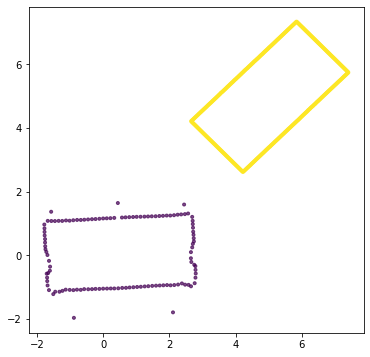

Ep: 1420 | loss: 37.8133430480957 | wgw_cost: 31.637577056884766 |:  14%|█▍        | 1420/10000 [38:50<4:00:03,  1.68s/epoch]  

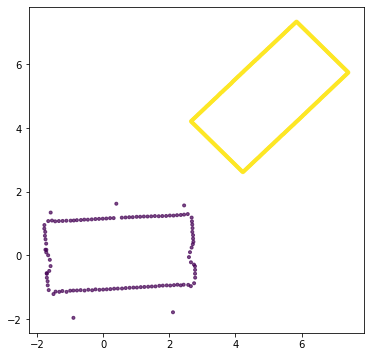

Ep: 1428 | loss: 7.978574752807617 | wgw_cost: 0.3066377341747284 |:  14%|█▍        | 1429/10000 [39:03<3:51:39,  1.62s/epoch] 

In [ ]:
#X = x.clone().detach().requires_grad_(True)
#Y = y.clone().detach().requires_grad_(True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

nx = 50
n = nx * 6

X = torch.randn((n, 2), requires_grad=True, device=device)
px = torch.ones(X.shape[0])
px /= px.sum()

z1 = torch.tensor([[0., 1/nx *i] for i in range(2*nx)])
z2 = torch.tensor([[1., 1./nx * i] for i in range(1, 2*nx+1)])
z3 = torch.tensor([[1./nx *i, 0.] for i in range(1, nx+1)])
z4 = torch.tensor([[1./nx *i, 2.] for i in range(nx)])

zx = torch.cat((z1, z2, z3, z4), dim=0)
print('x: %s points' %len(zx))

Cx = cost_matrix(zx, zx) * 6 #*10

visualize_points(zx, zx)


ny = 50
n = ny * 6
data = data=torch.randn((n,2), device=device) + 5
Y = data.clone().detach().requires_grad_(True)
py = torch.ones(Y.shape[0])
py /= py.sum()


z1 = torch.tensor([[0., 1/ny *i] for i in range(2*ny)])
z2 = torch.tensor([[1., 1./ny * i] for i in range(1, 2*ny+1)])
z3 = torch.tensor([[1./ny *i, 0.] for i in range(1, ny+1)])
z4 = torch.tensor([[1./ny *i, 2.] for i in range(ny)])

zy = torch.cat((z1, z2, z3, z4), dim=0)
print('y: %s points' %len(zy))

Cy = cost_matrix(zy, zy) * 2 #*10

visualize_points(zy, zy)



visualize_points(X.detach().to('cpu'), Y.detach().to('cpu'))


P = px.unsqueeze(1) * py.unsqueeze(0)




#print('P: ', P.sum(), P.shape)
#print('C: ', C)


#device = 'cpu'
print(device)

#px = px.to(device)
#py = py.to(device)

P = P.to(device)

Cx = Cx.to(device)
Cy = Cy.to(device)

C = Cx

lamda = .0 #0. #.3 #0.3 #1. #.3 #0.5 #1. #0. #0.3 #0.5

#optimizer = torch.optim.Adam([X, Y], lr=0.05, weight_decay=1e-5)
optimizer = torch.optim.Adam([X, Y], lr=0.01, weight_decay=1e-5)

alpha = 1e-3

entropic_wgw = Entropic_WGW(eps=1e-3, lamda=lamda, max_iter=50, thresh=1e-9, w_max_iter=50, w_thresh=1e-9, stable_sinkhorn=True, data_precision='float', verbose=False)

epochs = 10000

epochs_iter = tqdm(range(epochs), unit='epoch')

#loss in batch

for i in epochs_iter:
    
    for _ in range(1):
        optimizer.zero_grad()
        
        wgw_cost = wgw_loss(X, Y, P, lamda=lamda)
        loss = wgw_cost + alpha * torch.sum((cost_matrix(X, X) - Cx)**2) + alpha * torch.sum((cost_matrix(Y, Y) - Cy)**2)

        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        _, P = entropic_wgw(X, Y)
        
    epochs_iter.set_description(
        'Ep: %s | loss: %s | wgw_cost: %s |' %(i, loss.item(), wgw_cost.item())
    )
    
    if i % 10 == 0:
        visualize_points(X.detach().to('cpu') + 0.2, Y.detach().to('cpu'), alpha=0.7, marker='.')
    
print('loss: ', loss.item())

In [ ]:
Cy, Cx

#### NOTE:
lamda = 0. only gromov-wasserstein => works, converge relatively fast \
lamda = 1. only wasserstein => works, but need smaller lr to escape local minimum, need more epochs to converge \
lamda = 0.3 both w + gw => works, slower code, more time to run \
\
=> OKIE
\
\
### Need to check when training with small batch

#### NOTE:

when the distance matrices Cx, Cy are the same but two different matrices
\
w: seems to work, with both nx = ny or nx != ny
\ 
gw: seems not to converge even with nx = ny

(<matplotlib.image.AxesImage at 0x2aca67ed5b50>,
 torch.Size([600, 2]),
 torch.Size([300, 2]))

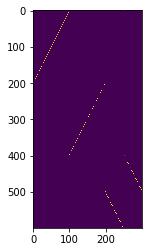

In [9]:
plt.imshow(P.to('cpu')) , X.shape, Y.shape

(<matplotlib.image.AxesImage at 0x2b8dcfefe1d0>,
 torch.Size([120, 2]),
 torch.Size([600, 2]))

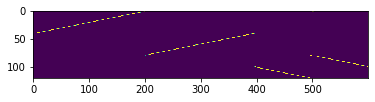

In [10]:
plt.imshow(P.to('cpu')) , X.shape, Y.shape

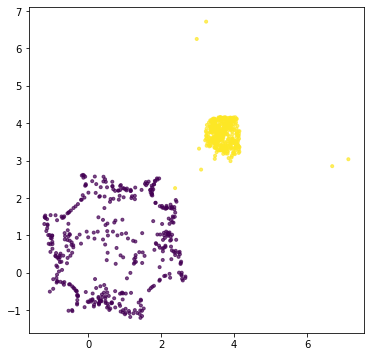

In [11]:
# only wasserstein
visualize_points(X.detach().to('cpu') + .2, Y.detach().to('cpu'), alpha=0.7, marker='.')

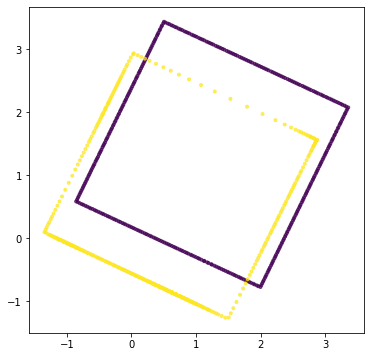

In [17]:
# only gromov
visualize_points(X.detach().to('cpu') + 0.5, Y.detach().to('cpu'), alpha=0.7, marker='.')

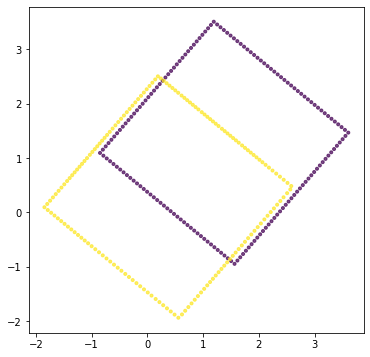

In [21]:
# lamda = 0.3
visualize_points(X.detach().to('cpu') + 1, Y.detach().to('cpu'), alpha=0.7, marker='.')

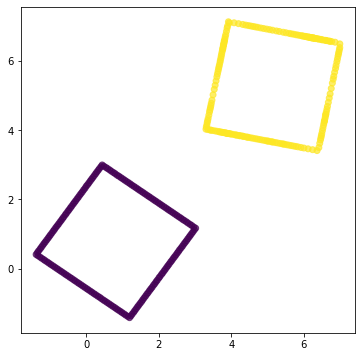

In [30]:
# lamda = 0.5
visualize_points(X.detach().to('cpu') + 0.3, Y.detach().to('cpu'), alpha=0.7, marker='.')

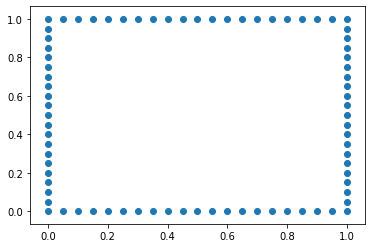

In [349]:
plt.scatter(z[:,0], z[:,1])

In [328]:
C

tensor([[ 0.0000,  0.0700,  0.2800,  ..., 10.4300, 11.4800, 12.6700],
        [ 0.0700,  0.0000,  0.0700,  ...,  9.1000, 10.1500, 11.3400],
        [ 0.2800,  0.0700,  0.0000,  ...,  7.9100,  8.9600, 10.1500],
        ...,
        [10.4300,  9.1000,  7.9100,  ...,  0.0000,  0.0700,  0.2800],
        [11.4800, 10.1500,  8.9600,  ...,  0.0700,  0.0000,  0.0700],
        [12.6700, 11.3400, 10.1500,  ...,  0.2800,  0.0700,  0.0000]],
       device='cuda:0')

In [333]:
cost_matrix(X.detach(), X.detach()).long()

tensor([[ 0,  0,  0,  ..., 10, 11, 12],
        [ 0,  0,  0,  ...,  9, 10, 11],
        [ 0,  0,  0,  ...,  7,  8, 10],
        ...,
        [10,  9,  7,  ...,  0,  0,  0],
        [11, 10,  8,  ...,  0,  0,  0],
        [12, 11, 10,  ...,  0,  0,  0]], device='cuda:0')

In [332]:
cost_matrix(Y.detach(), Y.detach()).long()

tensor([[0, 7, 0,  ..., 8, 6, 3],
        [7, 0, 6,  ..., 0, 5, 2],
        [0, 6, 0,  ..., 6, 7, 1],
        ...,
        [8, 0, 6,  ..., 0, 4, 3],
        [6, 5, 7,  ..., 4, 0, 8],
        [3, 2, 1,  ..., 3, 8, 0]], device='cuda:0')

In [181]:
Y.detach()

tensor([[5.2502, 3.3412],
        [5.2502, 3.3412],
        [0.2823, 3.9065],
        [5.2502, 3.3412],
        [1.7768, 1.1197],
        [5.2502, 3.3412],
        [0.3227, 2.4929],
        [3.7962, 4.7144],
        [0.9689, 4.6335],
        [2.4230, 3.2603]])

In [182]:
X.detach()

tensor([[5.2503, 3.3412],
        [5.2503, 3.3412],
        [0.2823, 3.9065],
        [5.2503, 3.3412],
        [1.7768, 1.1197],
        [5.2503, 3.3412],
        [0.3228, 2.4929],
        [3.7962, 4.7144],
        [0.9689, 4.6335],
        [2.4230, 3.2603]])